In [46]:
import numpy as np
from matplotlib import pyplot as plt

from PIL import Image
import imageio.v2 as imageio

In [17]:
side_length = 2000
corr_length = 500
grid_x, grid_y = np.meshgrid(grids, grids)

cov_mat = np.exp(- np.abs(grid_x - grid_y) / corr_length)

arena = np.random.multivariate_normal(-0.5 * np.ones(side_length), cov_mat, side_length)
arena[arena < 0] = 0

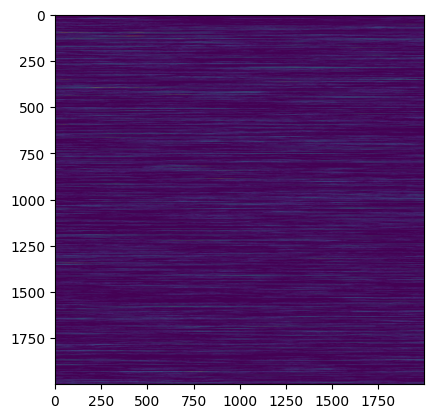

In [18]:
plt.imshow(arena)

In [78]:
im_frame = Image.open('symbols.png')
image = np.array(im_frame)[:, :, 3] / 255

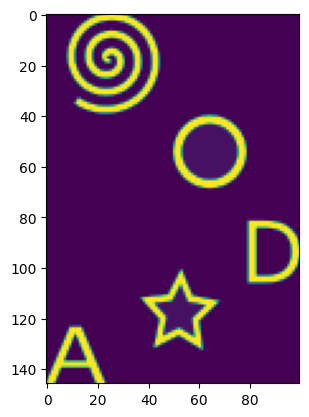

In [79]:
plt.imshow(image)

In [40]:
image.shape

(146, 100)

In [88]:
path_lower_corner = [(146 - i, i) for i in range(10)]

In [89]:
video = np.asarray([image[corner[0] - 20:corner[0], corner[1]: corner[1]+20] for corner in path_lower_corner])

In [90]:
imageio.mimsave(
        'test.gif',
        video,
        duration=0
    )

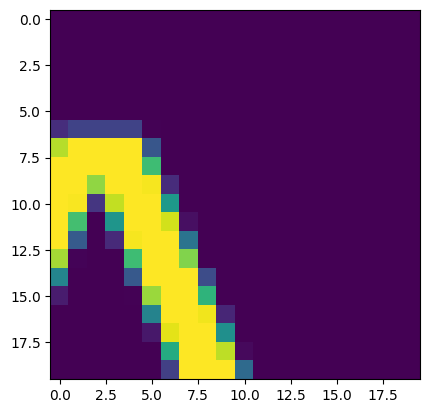

In [93]:
plt.imshow(video[9])

In [82]:
corner = path_lower_corner[0]
corner

(146, 0)

In [86]:
a = image[corner[0] - 20:corner[0], corner[1]: corner[1] + 20]

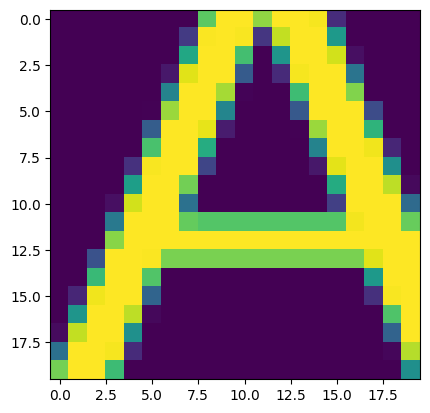

In [87]:
plt.imshow(a)

In [121]:
im_raw = []
for i in range(1,5):
    im_raw.append(np.array(Image.open(f'{i}.png'))[:, :, 3] / 255)


img_raw = np.asarray(im_raw)


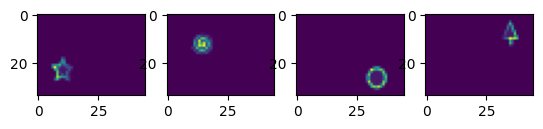

In [122]:
fig, ax = plt.subplots(ncols=4)

for i in range(4):
    ax[i].imshow(img_raw[i])

In [138]:
num_static = 4
num_trans = 3

frames_transition = 200 
frames_static = 200

frames = {
    'static': frames_static,
    'transition': frames_transition
}

counter = 0

input_stream = []


for phase_id in range(num_static + num_trans):
    if phase_id % 2 == 0:
        phase = 'static'
        img = phase_id // 2
    else:
        phase = 'transition'
        prev_img = (phase_id - 1) // 2
        next_img = (phase_id + 1) // 2

    for i in range(frames[phase]):
        if phase == 'transition':
            alpha = i / (frames[phase] - 1)
            frame = (1 - alpha) * img_raw[prev_img].copy() + alpha * img_raw[next_img].copy()
        else:
            frame = imgs_cast[img].copy()
    
        input_stream.append(frame)


input_stream = np.array(input_stream)

input_stream_gif = input_stream.copy() * 255

input_stream_gif = input_stream_gif.astype(np.uint8)

In [137]:
imageio.mimsave(
        'test.gif',
        input_stream_gif,
        duration=0
    )

In [128]:
input_stream.sum()

np.float64(160306.66836520043)

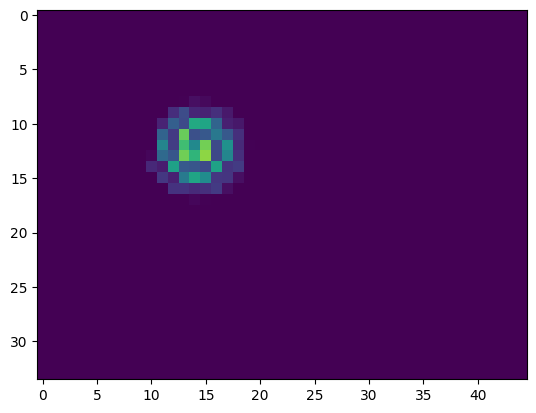

In [135]:
plt.imshow(input_stream[800], vmax=1)

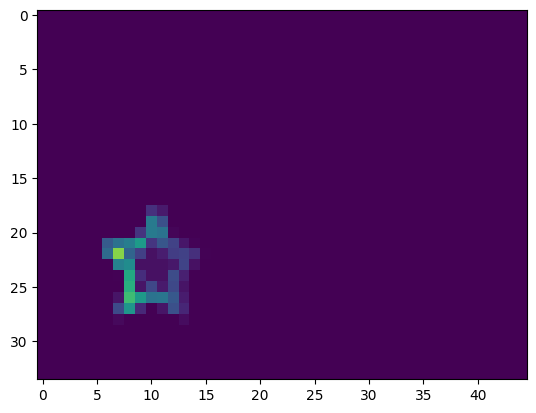

In [134]:
plt.imshow(input_stream[0], vmax=1)

In [ ]:
np.save('linear_track.npy', input_stream)

In [296]:
video = []
video_scrambled = []
grid_x, grid_y = np.meshgrid(np.arange(0, 30, 1), np.arange(0, 30, 1))
sigma = 20

n_frames = 100
offset = 500

start_point_x = 5
start_point_y = 25

steps_x = 20
steps_y = 20
sin_const = 0.1 * n_frames
sigma = 10

velocity_x = steps_x / n_frames
velocity_y = steps_y / n_frames

for i in range(n_frames):

    bump = np.exp( -((grid_x - start_point_x - velocity_x * (i)) **2
                     + (grid_y - start_point_y + velocity_y * (i) + 3 * np.sin((i - offset) / sin_const))**2) ** 2 / (2 * sigma**2)).flatten()
        
    video.append(bump)
    video_scrambled.append(bump[mask])

        

video = np.array(video).reshape(n_frames, 30, 30)
video_scrambled = np.array(video_scrambled).reshape(n_frames, 30, 30)

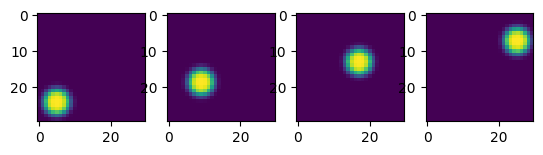

In [300]:
fig, axs = plt.subplots(ncols=4)


axs[0].imshow(video[0])
axs[1].imshow(video[20])
axs[2].imshow(video[60])
axs[3].imshow(video[99])

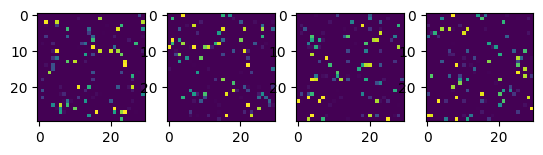

In [298]:
fig, axs = plt.subplots(ncols=4)


axs[0].imshow(video_scrambled[0])
axs[1].imshow(video_scrambled[20])
axs[2].imshow(video_scrambled[60])
axs[3].imshow(video_scrambled[99])

In [274]:
mask = np.random.choice(900, 900, replace=False)

In [294]:
video = []
video_scrambled = []
grid_x, grid_y = np.meshgrid(np.arange(0, 30, 1), np.arange(0, 30, 1))
sigma = 20

n_frames = 20000
offset = 500

start_point_x = 5
start_point_y = 25

steps_x = 20
steps_y = 20
sin_const = 0.1 * n_frames

velocity_x = steps_x / n_frames
velocity_y = steps_y / n_frames
sigma = 10

for i in range(n_frames):

    bump = np.exp( -((grid_x - start_point_x - velocity_x * (i)) **2
                     + (grid_y - start_point_y + velocity_y * (i) + 0 * np.sin((i - offset) / sin_const))**2) ** 2 / (2 * sigma**2)).flatten()
        
    video.append(bump)
    video_scrambled.append(bump[mask])

        

video = np.array(video).reshape(n_frames, 30, 30)
video_scrambled = np.array(video_scrambled).reshape(n_frames, 30, 30)

In [295]:
np.save('input_video.npy', video_scrambled)

In [488]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter  # SciPy必要


def make_wall_texture_rgb(nx=200, ny=40, variance_tiles=2.0, seed=0, wrap_x=False, wrap_y=False):
    """
    2Dの壁テクスチャ (ny, nx, 3) を作る。
    - 初期: 各ピクセルRGBをU[0,1]でランダム
    - 平滑化: 各色チャネルに2D Gaussian filter
    variance_tiles=2.0 -> sigma = sqrt(2) (tile単位)
    """
    rng = np.random.default_rng(seed)
    wall = rng.uniform(0.0, 1.0, size=(ny, nx, 3)).astype(np.float32)

    sigma = float(np.sqrt(variance_tiles))

    mode_x = "wrap" if wrap_x else "reflect"
    mode_y = "wrap" if wrap_y else "reflect"

    out = np.empty_like(wall)
    for c in range(3):
        out[:, :, c] = gaussian_filter(
            wall[:, :, c],
            sigma=(sigma, sigma),
            mode=(mode_y, mode_x),  # (y, x)
        ).astype(np.float32)

    return np.clip(out, 0.0, 1.0)

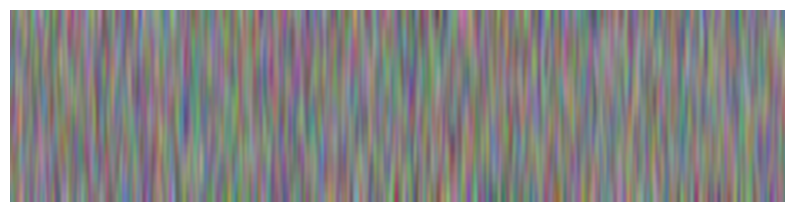

In [532]:
nx = 800  # track direction
ny = 20    # vertical axis
wall_rgb = make_wall_texture_rgb(nx=nx, ny=ny, variance_tiles=2.0, seed=0)


plt.figure(figsize=(10, 2.5))
plt.imshow(wall_rgb, aspect="auto")
plt.axis("off")
plt.show()

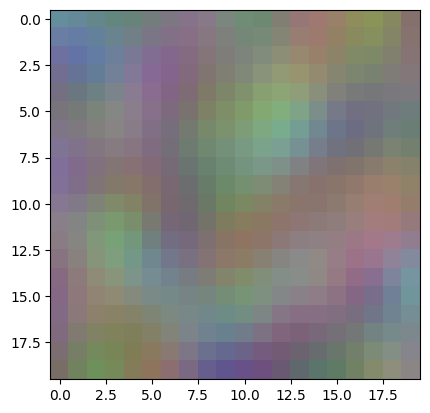

In [523]:
plt.imshow(wall_rgb[:, 200:220])

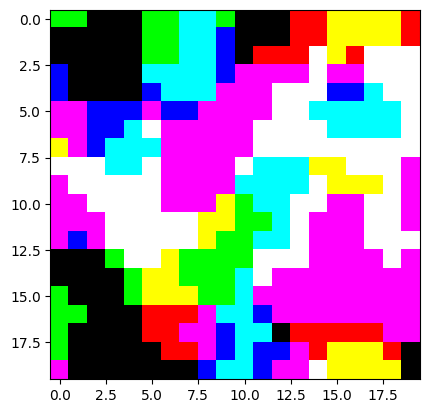

In [513]:
half = nx // 2

wall_rgb[:, half:half + ny, 0][wall_rgb[:, half: half + ny, 0] > 0.5] = 1
wall_rgb[:, half: half + ny, 0][wall_rgb[:, half: half + ny, 0] < 0.5] = 0
wall_rgb[:, half:half + ny, 1][wall_rgb[:, half: half + ny, 1] > 0.5] = 1
wall_rgb[:, half: half + ny, 1][wall_rgb[:, half: half + ny, 1] < 0.5] = 0.
wall_rgb[:, half:half + ny, 2][wall_rgb[:, half: half + ny, 2] > 0.5] = 1
wall_rgb[:, half: half + ny, 2][wall_rgb[:, half: half + ny, 2] < 0.5] = 0.
plt.imshow(wall_rgb[:, half:half + ny])

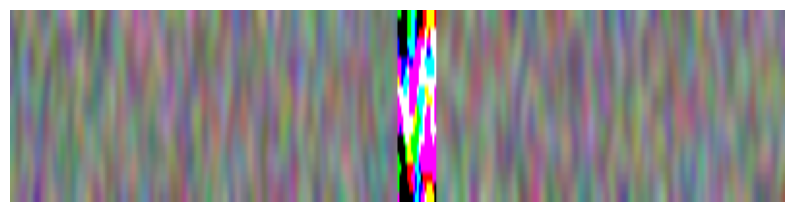

In [514]:
plt.figure(figsize=(10, 2.5))
plt.imshow(wall_rgb, aspect="auto")
plt.axis("off")
plt.show()

In [533]:
slides = int(nx / ny)
steps_per_frame = 200

In [543]:
input_stream = []

for i in range(slides):
    for j in range(steps_per_frame):
        input_stream.append(wall_rgb[:,i * ny: (i + 1) * ny].copy())

input_stream = np.asarray(input_stream)

In [544]:
np.save('../fig_2/input_stream.npy', input_stream)

In [538]:
ny

20